<a href="https://colab.research.google.com/github/Divyam-Deep/KMean-Kaggle-Submission/blob/main/Kmean_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
sns.set()

In [ ]:
data = pd.read_csv('/content/data.csv')
data

,ID,RRmean,PTdis,STdis,RRTot,SDRR,hbpermin,PQdis,PQslope,QRdis,QRSseg,PQseg,Pseg,NN50,STseg,STslope,Tseg
0,0,358.185185,95.000002,36.375684,28,118.947245,60.179104,24.164337,-0.039751,16.971024,0.095734,0.068552,0.029563,11,0.101091,0.017092,0.108631
1,1,84.134454,20.786934,13.809141,120,3.059424,91.428571,7.078599,-0.193178,0.050422,0.021151,0.063310,0.050924,1,0.100705,0.063261,0.089558
2,2,315.258064,89.258170,21.690140,32,11.503065,68.571429,29.003153,-0.013569,22.501573,0.101389,0.084500,0.064722,4,0.068889,0.034507,0.094667
3,3,197.693878,38.413132,25.029068,50,1.798004,75.000000,13.531768,-0.136163,0.000000,0.000000,0.053095,0.064714,0,0.100000,0.048226,0.100190
4,4,312.838710,105.806455,35.747960,32,11.273997,68.503469,38.327021,-0.015234,16.125269,0.088108,0.106771,0.043837,2,0.099306,0.018280,0.095399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,895,297.375000,96.781787,36.783138,33,63.553496,71.280000,25.607664,-0.032664,18.349942,0.093697,0.087447,0.070246,7,0.100267,0.009748,0.129167
896,896,286.882353,67.382815,21.654941,35,24.585702,75.000000,15.535835,-0.067423,14.895967,0.068750,0.059989,0.047756,4,0.074466,0.027122,0.102938
897,897,108.163044,30.521773,6.680616,93,9.026865,71.139442,12.971889,-0.048678,5.739907,0.072980,0.092511,0.058975,7,0.069264,0.136371,0.061452
898,898,146.328358,39.435649,25.710653,68,7.213975,102.000000,13.453077,-0.086668,0.149677,0.013432,0.060741,0.060494,1,0.098173,0.026701,0.156494


In [ ]:
data.columns

Index(['ID', 'RRmean', 'PTdis', 'STdis', 'RRTot', 'SDRR', 'hbpermin', 'PQdis',
       'PQslope', 'QRdis', 'QRSseg', 'PQseg', 'Pseg', 'NN50', 'STseg',
       'STslope', 'Tseg'],
      dtype='object')

In [ ]:
data.isnull().sum()

,0
ID,0
RRmean,0
PTdis,0
STdis,0
RRTot,0
SDRR,0
hbpermin,0
PQdis,0
PQslope,0
QRdis,0


In [ ]:
#id is of no use then
cleaned_data = data.drop('ID',axis=1)
cleaned_data.head()

,RRmean,PTdis,STdis,RRTot,SDRR,hbpermin,PQdis,PQslope,QRdis,QRSseg,PQseg,Pseg,NN50,STseg,STslope,Tseg
0,358.185185,95.000002,36.375684,28,118.947245,60.179104,24.164337,-0.039751,16.971024,0.095734,0.068552,0.029563,11,0.101091,0.017092,0.108631
1,84.134454,20.786934,13.809141,120,3.059424,91.428571,7.078599,-0.193178,0.050422,0.021151,0.063310,0.050924,1,0.100705,0.063261,0.089558
2,315.258064,89.258170,21.690140,32,11.503065,68.571429,29.003153,-0.013569,22.501573,0.101389,0.084500,0.064722,4,0.068889,0.034507,0.094667
3,197.693878,38.413132,25.029068,50,1.798004,75.000000,13.531768,-0.136163,0.000000,0.000000,0.053095,0.064714,0,0.100000,0.048226,0.100190
4,312.838710,105.806455,35.747960,32,11.273997,68.503469,38.327021,-0.015234,16.125269,0.088108,0.106771,0.043837,2,0.099306,0.018280,0.095399


In [ ]:
features = data[['RRTot', 'PTdis', 'STdis']]

In [ ]:
#scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)
scaled_data

array([[-1.19700843e+00,  1.44027469e+00,  1.28760056e+00],
       [ 1.55252130e+00, -1.18421266e+00, -8.78217836e-01],
       [-1.07746366e+00,  1.23721928e+00, -1.21840914e-01],
       ...,
       [ 7.45594094e-01, -8.39947649e-01, -1.56237620e+00],
       [-1.56072340e-03, -5.24715388e-01,  2.64026829e-01],
       [-1.04757747e+00,  1.89781190e+00,  7.22727276e-01]])

In [ ]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(i)
  kmeans.fit(scaled_data)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

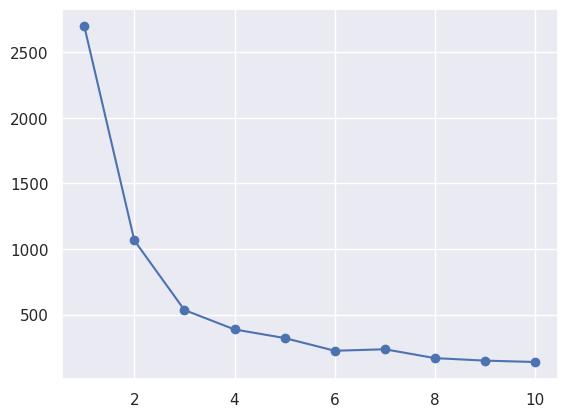

In [ ]:
plt.plot(range(1,11),wcss , marker='o')
plt.show()  #as its not clear much i will check with other methods also

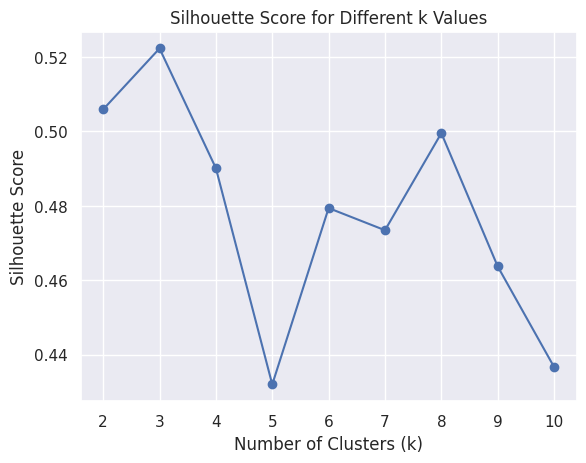

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 11):  # start from 2 because silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    silhouette_avg = silhouette_score(features, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# in this method we choose the max value

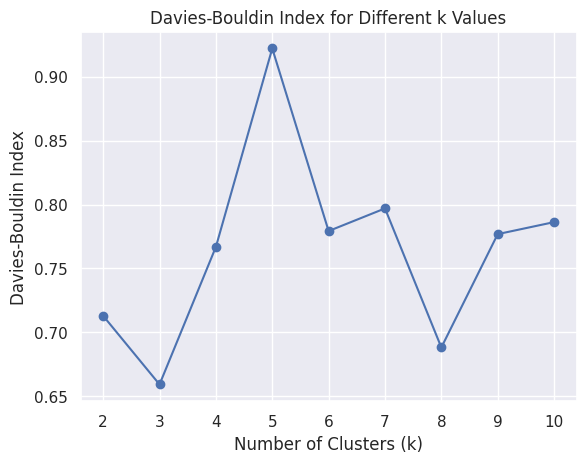

In [ ]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_scores = []
for i in range(2, 11):  # start from 2
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    db_score = davies_bouldin_score(features, kmeans.labels_)
    davies_bouldin_scores.append(db_score)

# Plotting the Davies-Bouldin scores
plt.plot(range(2, 11), davies_bouldin_scores, marker='o')
plt.title('Davies-Bouldin Index for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.show()

# in this we choose the min value

In [ ]:
kmeans_new = KMeans(3)
kmeans_new.fit(features)
clusters_new = features.copy()
clusters_new['Clusters'] = kmeans_new.fit_predict(features)
clusters_new.head()

,RRTot,PTdis,STdis,Clusters
0,28,95.000002,36.375684,2
1,120,20.786934,13.809141,0
2,32,89.258170,21.690140,2
3,50,38.413132,25.029068,1
4,32,105.806455,35.747960,2


In [ ]:
features

,RRTot,PTdis,STdis
0,28,95.000002,36.375684
1,120,20.786934,13.809141
2,32,89.258170,21.690140
3,50,38.413132,25.029068
4,32,105.806455,35.747960
...,...,...,...
895,33,96.781787,36.783138
896,35,67.382815,21.654941
897,93,30.521773,6.680616
898,68,39.435649,25.710653


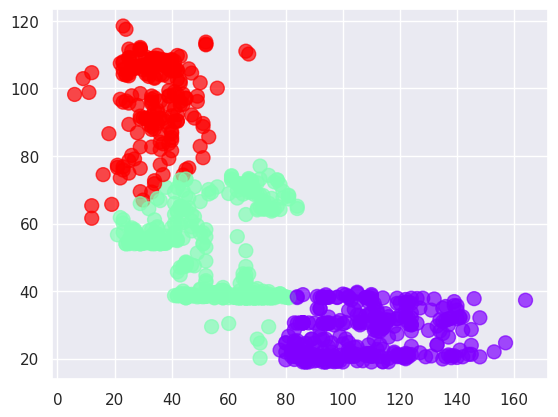

In [ ]:
plt.scatter(clusters_new['RRTot'], clusters_new['PTdis'], c=clusters_new['Clusters'], cmap='rainbow',s=100, alpha=0.7)
plt.show()

In [ ]:
submission = pd.DataFrame({
    'ID': data['ID'],
    'Category': clusters_new['Clusters']
})
submission = submission[['ID', 'Category']]

submission.to_csv('Divyam_Deep-Kmean-Clustering-submission1.csv', index=False)
